In [144]:
# Initial import all libraries
import panel as pn
pn.extension('plotly')
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

In [145]:
# Fetch S&P/TSX Composite data from 01/01/2019 until 03/03/2022
spy_tsx = yf.Ticker('^GSPTSE')
data = spy_tsx.history(interval='1d', start='2019-01-01', end='2022-03-03')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,14163.900391,14400.299805,14112.799805,14347.200195,27031980000,0,0
2019-01-03,14294.099609,14297.900391,14155.299805,14212.799805,21158720000,0,0
2019-01-04,14351.599609,14438.599609,14314.799805,14426.599609,23123720000,0,0
2019-01-07,14471.000000,14515.099609,14383.099609,14504.099609,25783200000,0,0
2019-01-08,14610.500000,14645.599609,14533.900391,14605.200195,26010090000,0,0
...,...,...,...,...,...,...,...
2022-02-24,20500.500000,20770.400391,20397.199219,20761.900391,39783570000,0,0
2022-02-25,20828.099609,21114.000000,20784.000000,21106.000000,27294430000,0,0
2022-02-28,21010.900391,21142.400391,20951.900391,21126.400391,39347190000,0,0


In [146]:
# Filter for closing price only
price = data[['Close']]
price.head()

,Close
Date,
2019-01-02,14347.200195
2019-01-03,14212.799805
2019-01-04,14426.599609
2019-01-07,14504.099609
2019-01-08,14605.200195


In [147]:
# Count nulls
price.isnull().sum()

Close    0
dtype: int64

In [148]:
# Check if closing price is float 
price.dtypes

Close    float64
dtype: object

In [149]:
# Find out min and max value
min_spy_tsx = price["Close"].min()
max_spy_tsx = price["Close"].max()

In [150]:
min_spy_tsx

11228.5

In [151]:
max_spy_tsx

21768.5

In [152]:
def chart_spy ():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(price["Close"])
    ax.set(xlabel = "Year",
    ylabel = "Price")
    plt.yticks(np.linspace(min_spy_tsx.min(), max_spy_tsx.max(),10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return chart_spy

In [153]:
chart_spy
# plot doesn't show up on my notebook, but it has to work for others

<function __main__.chart_spy()>

In [154]:
# Calculate returns for SPY/TSX Composite as a benchmark
spy_tsx_return = price [["Close"]]
spy_tsx_return = spy_tsx_return.pct_change().dropna()
spy_tsx_return.rename(columns= {"Close" : "Benchmark Daily Return"}, inplace = True)
spy_tsx_return

,Benchmark Daily Return
Date,
2019-01-03,-0.009368
2019-01-04,0.015043
2019-01-07,0.005372
2019-01-08,0.006970
2019-01-09,0.013660
...,...
2022-02-24,0.000853
2022-02-25,0.016574
2022-02-28,0.000967


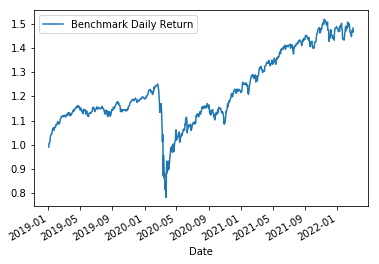

In [155]:
(spy_tsx_return+1).cumprod().plot()

In [156]:
# Calculating cumulative return
spy_tsx_return["Benchmark Cumulative Return"] = (1 + spy_tsx_return["Benchmark Daily Return"]).cumprod() - 1

In [157]:
spy_tsx_return

,Benchmark Daily Return,Benchmark Cumulative Return
Date,,
2019-01-03,-0.009368,-0.009368
2019-01-04,0.015043,0.005534
2019-01-07,0.005372,0.010936
2019-01-08,0.006970,0.017983
2019-01-09,0.013660,0.031888
...,...,...
2022-02-24,0.000853,0.447105
2022-02-25,0.016574,0.471088
2022-02-28,0.000967,0.472510


In [158]:
# Total return and CAGR(Compound Annual Growth Rate)
total_return_pct = round(spy_tsx_return["Benchmark Cumulative Return"][-1]*100, 2)
cagr_pct = round((((1+ spy_tsx_return["Benchmark Cumulative Return"][-1])**(1/3))-1)*100,2)
print(total_return_pct)
print(cagr_pct)

48.15
14.0


In [159]:
# Calculate standard deviation for SPY/TSX Composite
#annualized_std_spy_tsx = spy_tsx_return["BM Daily Return"].std()*np.sqrt(252)
#annualized_std_spy_tsx
std_spy_tsx = spy_tsx_return["Benchmark Daily Return"].std()
std_spy_tsx

0.012677687739221146

In [160]:
# Calculate sharpe ratio for SPY/TSX Composite as a benchmark
#sharpe_ratio_spy_tsx = (spy_tsx_return["BM Daily Return"].mean())/(annualized_std_spy_tsx)
#sharpe_ratio_spy_tsx
sharpe_ratio_spy_tsx = ((spy_tsx_return["Benchmark Daily Return"].mean())/std_spy_tsx)* 252
sharpe_ratio_spy_tsx

11.460137541125595

In [161]:
# Calculate sortino ratio for SPY/TSX Composite as a benchmark
std_neg = (spy_tsx_return["Benchmark Daily Return"][spy_tsx_return["Benchmark Daily Return"]<0]).std()
sortino_ratio_spy_tsx = ((spy_tsx_return["Benchmark Daily Return"].mean())/(std_neg))* 252
sortino_ratio_spy_tsx

11.36995724191838

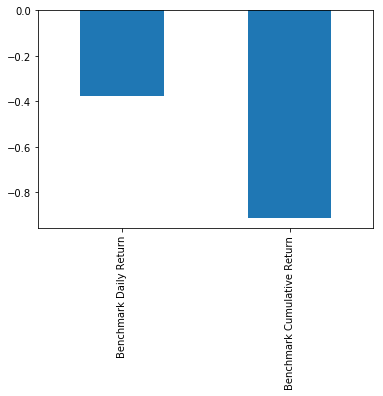

In [162]:
# Calculate max drawdown for SPY/TSX Composite as a benchmark
def max_drawdown(spy_tsx_return):
    comp_ret = (spy_tsx_return+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

max_drawdowns = spy_tsx_return.apply(max_drawdown,axis=0)
max_drawdowns.plot.bar()